In [101]:
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_score


In [102]:
df = pd.read_excel('rest_age.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [103]:
df["Genetical_Risk"]=0

In [104]:
df.shape

(29904, 14)

In [105]:
df.columns=df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [106]:
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0


### Handle NA Values

In [107]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [108]:
df.dropna(inplace=True)

In [109]:
df.isna().sum()
df.shape

(29886, 14)

In [110]:
df.duplicated().sum()

0

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,29886.0,43.396105,13.412657,26.0,34.00,42.0,52.0,356.0
number_of_dependants,29886.0,2.379910,1.431201,-3.0,1.00,3.0,3.0,5.0
income_lakhs,29886.0,23.364184,24.740339,1.0,7.00,17.0,32.0,930.0
annual_premium_amount,29886.0,20892.303821,6936.813440,3625.0,15697.25,20489.0,26360.0,43471.0
genetical_risk,29886.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


In [112]:
df[df.number_of_dependants<0]["number_of_dependants"].unique()

array([-1, -3], dtype=int64)

In [113]:
df["number_of_dependants"]=abs(df["number_of_dependants"])
df["number_of_dependants"].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [114]:
numeric_col=df.columns[df.dtypes!="object"].to_list()
numeric_col

['age',
 'number_of_dependants',
 'income_lakhs',
 'annual_premium_amount',
 'genetical_risk']

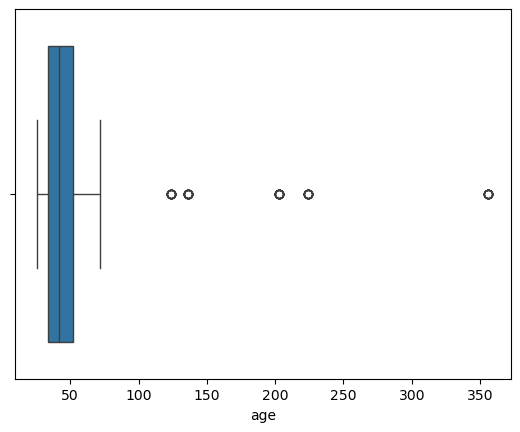

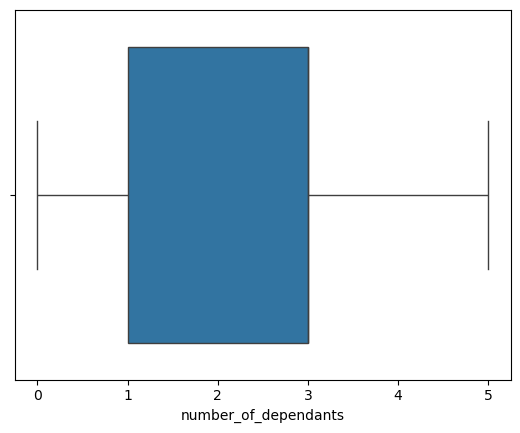

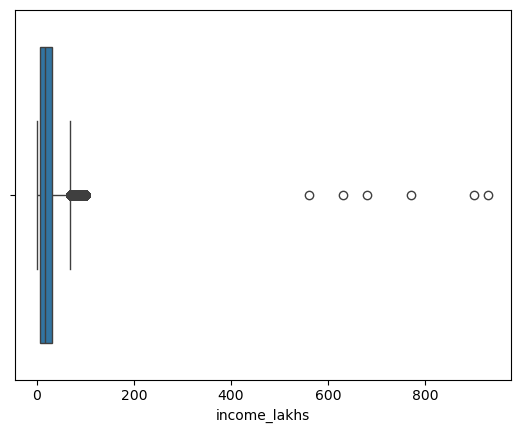

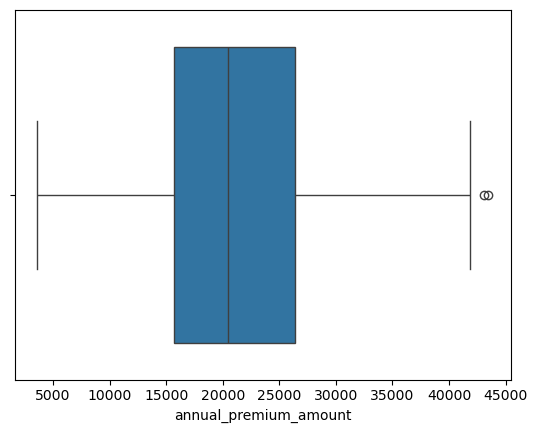

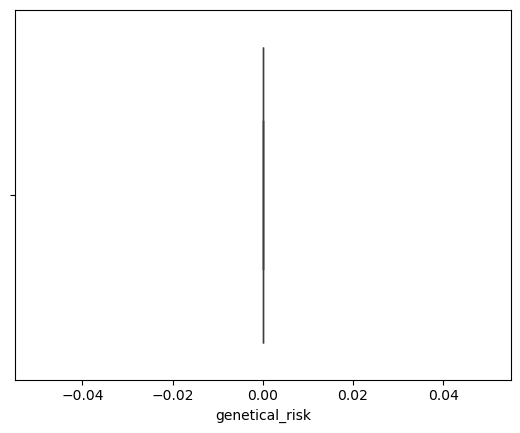

In [115]:
for col in numeric_col:
    sns.boxplot(x=df[col])
    plt.show()

In [116]:
df[df.age>100]["age"].unique()


array([224, 124, 136, 203, 356], dtype=int64)

In [117]:
df1=df[df.age<=100].copy()
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,29828.0,43.095380,11.041991,26.0,34.0,42.0,52.0,72.0
number_of_dependants,29828.0,2.387790,1.420641,0.0,1.0,3.0,3.0,5.0
income_lakhs,29828.0,23.371530,24.751262,1.0,7.0,17.0,32.0,930.0
annual_premium_amount,29828.0,20901.900563,6928.457636,6538.0,15706.0,20496.0,26361.0,43471.0
genetical_risk,29828.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [118]:
def get_iqr_bounce(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bounce=Q1-1.5*IQR
    upper_bounce=Q3+1.5*IQR
    return lower_bounce, upper_bounce

In [119]:
get_iqr_bounce(df1["income_lakhs"])

(-30.5, 69.5)

In [120]:
Quantile_threshold=df1.income_lakhs.quantile(0.999)
Quantile_threshold

100.0

In [121]:
df2=df1[df1.income_lakhs<=Quantile_threshold].copy()
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,29822.0,43.094896,11.042430,26.0,34.00,42.0,52.0,72.0
number_of_dependants,29822.0,2.387734,1.420644,0.0,1.00,3.0,3.0,5.0
income_lakhs,29822.0,23.226343,22.455408,1.0,7.00,17.0,32.0,100.0
annual_premium_amount,29822.0,20900.689223,6928.192115,6538.0,15705.25,20495.5,26360.0,43471.0
genetical_risk,29822.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


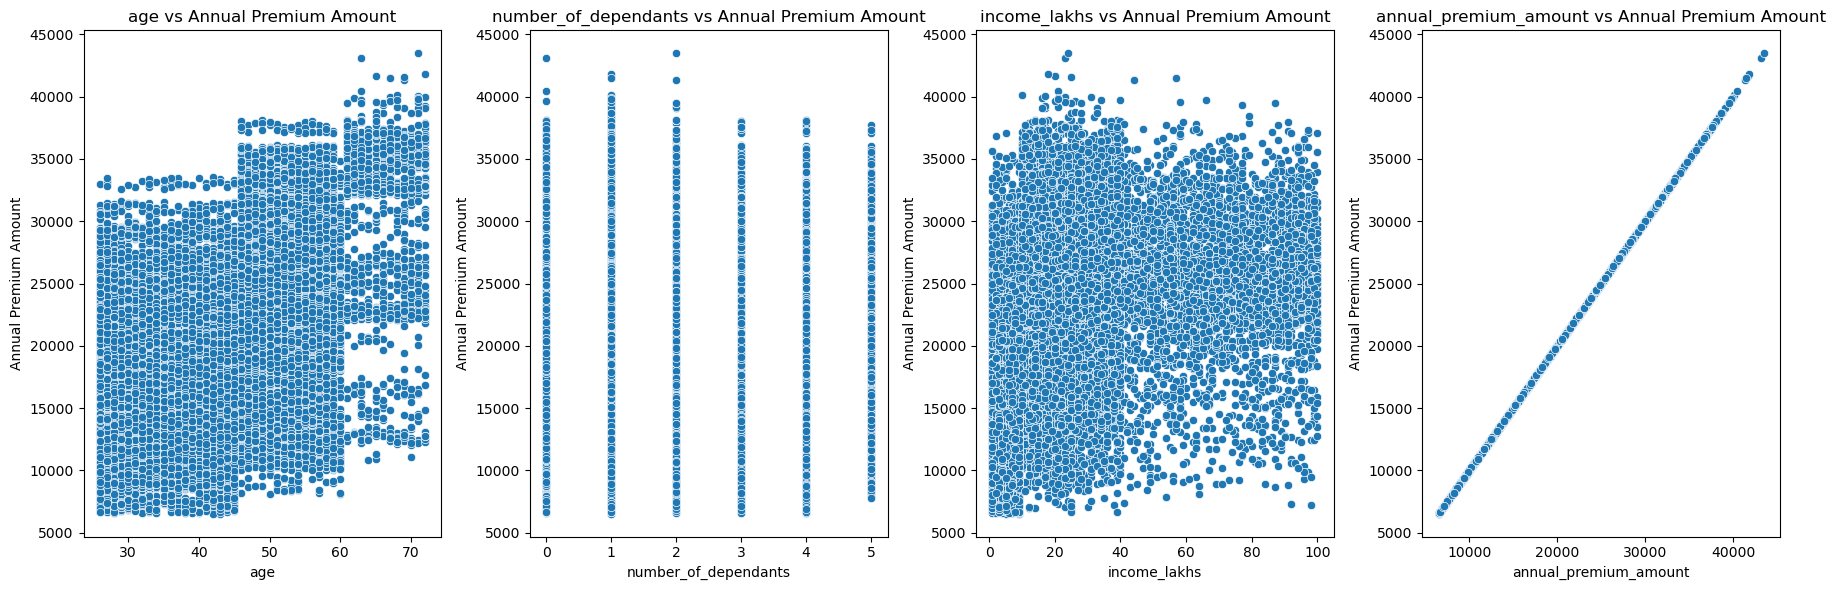

In [122]:
fig,axs=plt.subplots(1,4,figsize=(18,6))
for ax,col in zip(axs,numeric_col):
    
    sns.scatterplot(x=df2[col], y=df2["annual_premium_amount"],ax=ax)
    ax.set_title(f'{col} vs Annual Premium Amount')
    ax.set_xlabel(col)
    ax.set_ylabel("Annual Premium Amount")
plt.tight_layout()
plt.show()

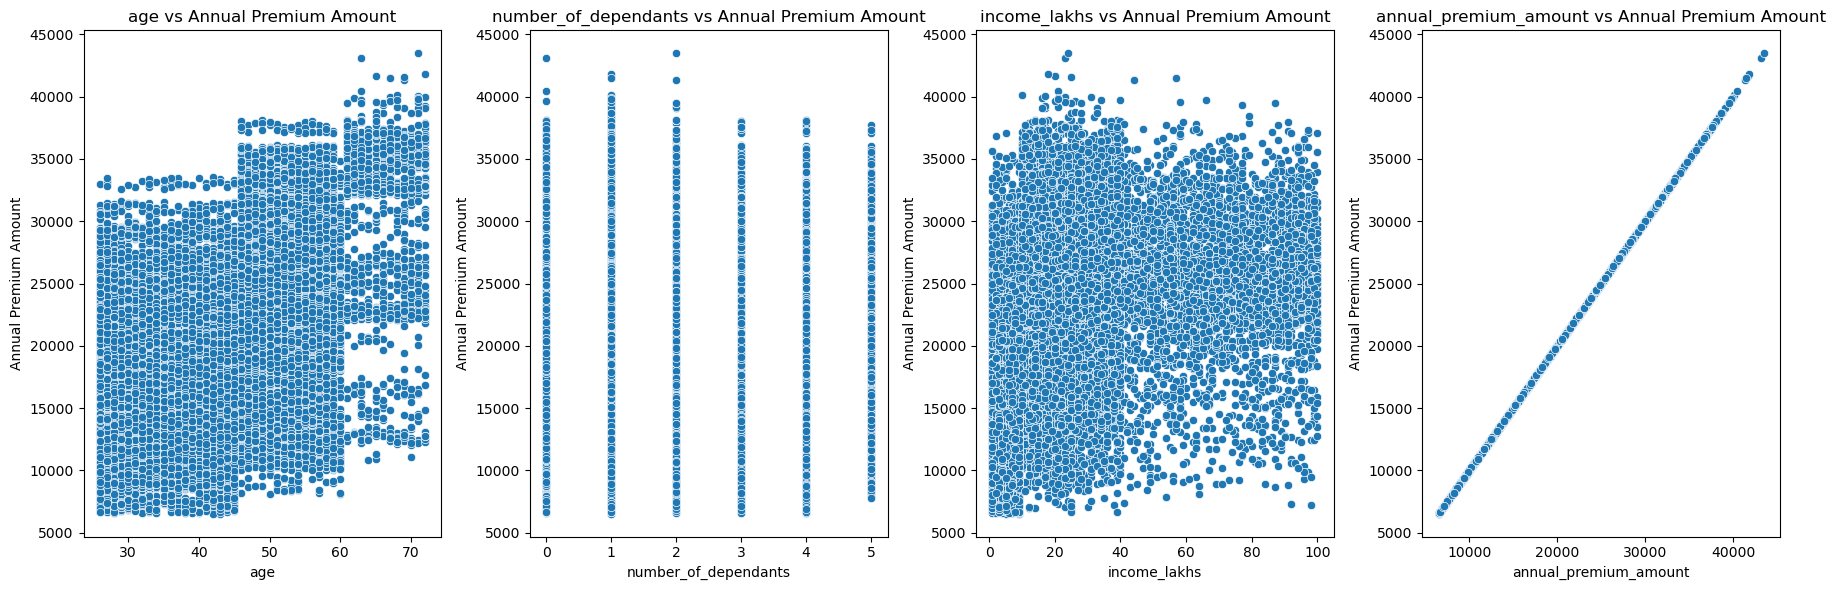

In [123]:
fig,axs=plt.subplots(1,4,figsize=(18,6))
for ax,col in zip(axs,numeric_col):
    
    sns.scatterplot(x=df2[col], y=df2["annual_premium_amount"],ax=ax)
    ax.set_title(f'{col} vs Annual Premium Amount')
    ax.set_xlabel(col)
    ax.set_ylabel("Annual Premium Amount")
plt.tight_layout()
plt.show()

In [124]:
categorical_col=df2.columns[df2.dtypes=="object"].to_list()
categorical_col

['gender',
 'region',
 'marital_status',
 'bmi_category',
 'smoking_status',
 'employment_status',
 'income_level',
 'medical_history',
 'insurance_plan']

In [125]:
for col in categorical_col:
    print(col,":",df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [126]:
df2["smoking_status"].replace({"Smoking=0":"No Smoking","Does Not Smoke":"No Smoking","Not Smoking":"No Smoking"},inplace=True)

C:\Users\Satya\AppData\Local\Temp\ipykernel_9928\2345664793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["smoking_status"].replace({"Smoking=0":"No Smoking","Does Not Smoke":"No Smoking","Not Smoking":"No Smoking"},inplace=True)


In [127]:
df2.smoking_status.unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [128]:
pct_count_gender=df2["gender"].value_counts(normalize=True)

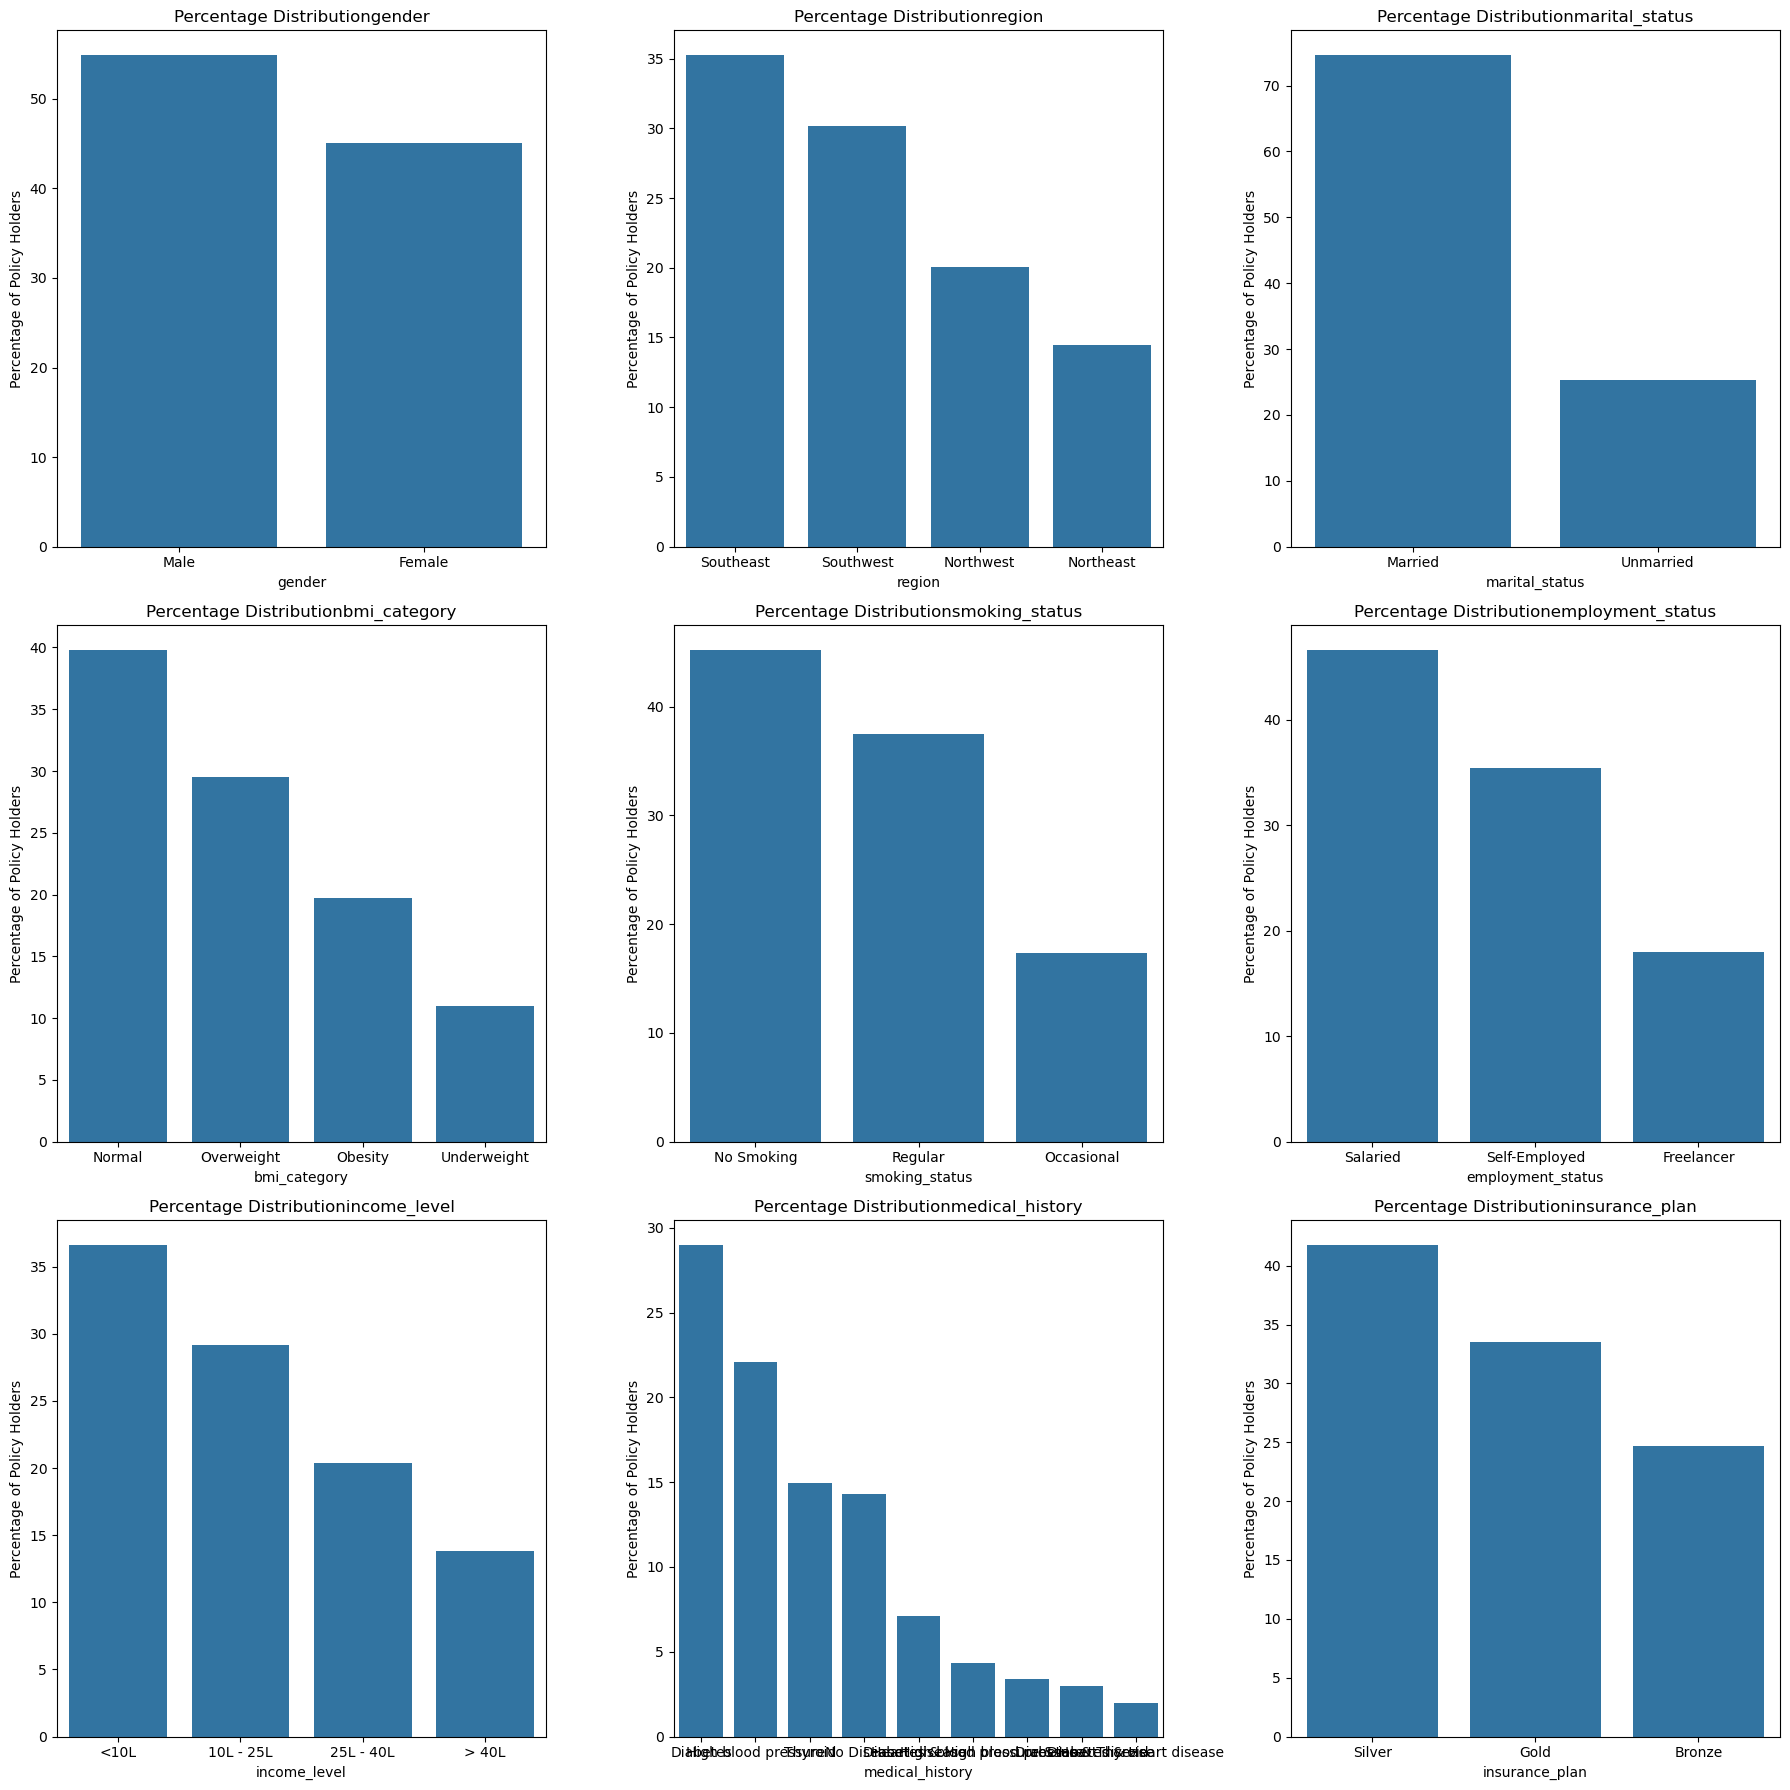

In [129]:
fig,axs=plt.subplots(3,3,figsize=(18,18))
axs = axs.flatten()
for ax,col in zip(axs,categorical_col):
    category_counts=df2[col].value_counts(normalize=True)*100
    
    sns.barplot(x=category_counts.index,y=category_counts.values,ax=ax)
    ax.set_title(f'Percentage Distribution{col}')
    ax.set_xlabel(col)
    ax.set_ylabel("Percentage of Policy Holders")
plt.tight_layout()
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


Text(0.5, 1.0, 'Income Level vs Insurance Plan')

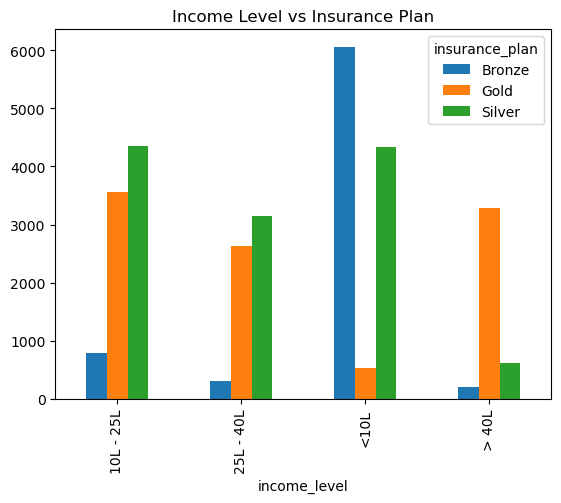

In [130]:
cross_tab=pd.crosstab(df2["income_level"],df2["insurance_plan"])
print(cross_tab)
cross_tab.plot(kind="bar")
plt.title("Income Level vs Insurance Plan")

In [131]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [132]:
# risk_score={"Diabetes":6,"Heart disease":8,"High blood pressure":6,"Thyroid":5,"No Disease":0,"None":0}
# df2[["disease1","disease2"]]=df2.medical_history.str.split("&",expand=True)
# df2.head(15)

In [133]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(15)

C:\Users\Satya\AppData\Local\Temp\ipykernel_9928\2503336130.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\Satya\AppData\Local\Temp\ipykernel_9928\2503336130.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,6,0.428571
5,33,Male,Southeast,Married,3,Normal,Regular,Self-Employed,<10L,4,Diabetes & High blood pressure,Silver,20653,0,diabetes,high blood pressure,12,0.857143
6,43,Male,Northeast,Married,3,Overweight,Regular,Salaried,> 40L,46,Thyroid,Gold,26926,0,thyroid,none,5,0.357143
7,59,Female,Southeast,Unmarried,0,Overweight,No Smoking,Freelancer,10L - 25L,21,No Disease,Gold,26101,0,no disease,none,0,0.000000
8,46,Female,Southeast,Married,4,Normal,Occasional,Self-Employed,10L - 25L,21,Thyroid,Gold,27176,0,thyroid,none,5,0.357143
9,68,Female,Southwest,Married,1,Normal,No Smoking,Self-Employed,<10L,1,Diabetes,Bronze,12596,0,diabetes,none,6,0.428571


### Yha se krna hai

In [134]:
# df2["disease1"].fillna("None",inplace=True)
# df2["disease2"].fillna("None",inplace=True)
# df2["Total_risk_score"]=0
# for disease in ["disease1","disease2"]:
#     df2["Total_risk_score"]+=df2[disease].map(risk_score)
# max_score=df2["Total_risk_score"].max()
# min_score=df2["Total_risk_score"].min()
# df2["normalized_risk_score"]=(df2["Total_risk_score"]-min_score)/(max_score-min_score)
# df2.head(15)

In [135]:
# max_score

In [136]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [137]:
df2["insurance_plan"]=df2["insurance_plan"].map({"Bronze":1,"Silver":2,"Gold":3})


In [138]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,1,15610,0,diabetes,none,6,0.428571


In [139]:
df2.insurance_plan.unique()

array([1, 2, 3], dtype=int64)

In [140]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [141]:
df2["income_level"]=df2["income_level"].map({"<10L":1,"10L - 25L":2,"> 40L":4,"25L - 40L":3})
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,2,14,Diabetes,1,15610,0,diabetes,none,6,0.428571


In [142]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1


In [143]:
df4=df3.drop(["medical_history","disease1","disease2","total_risk_score"],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


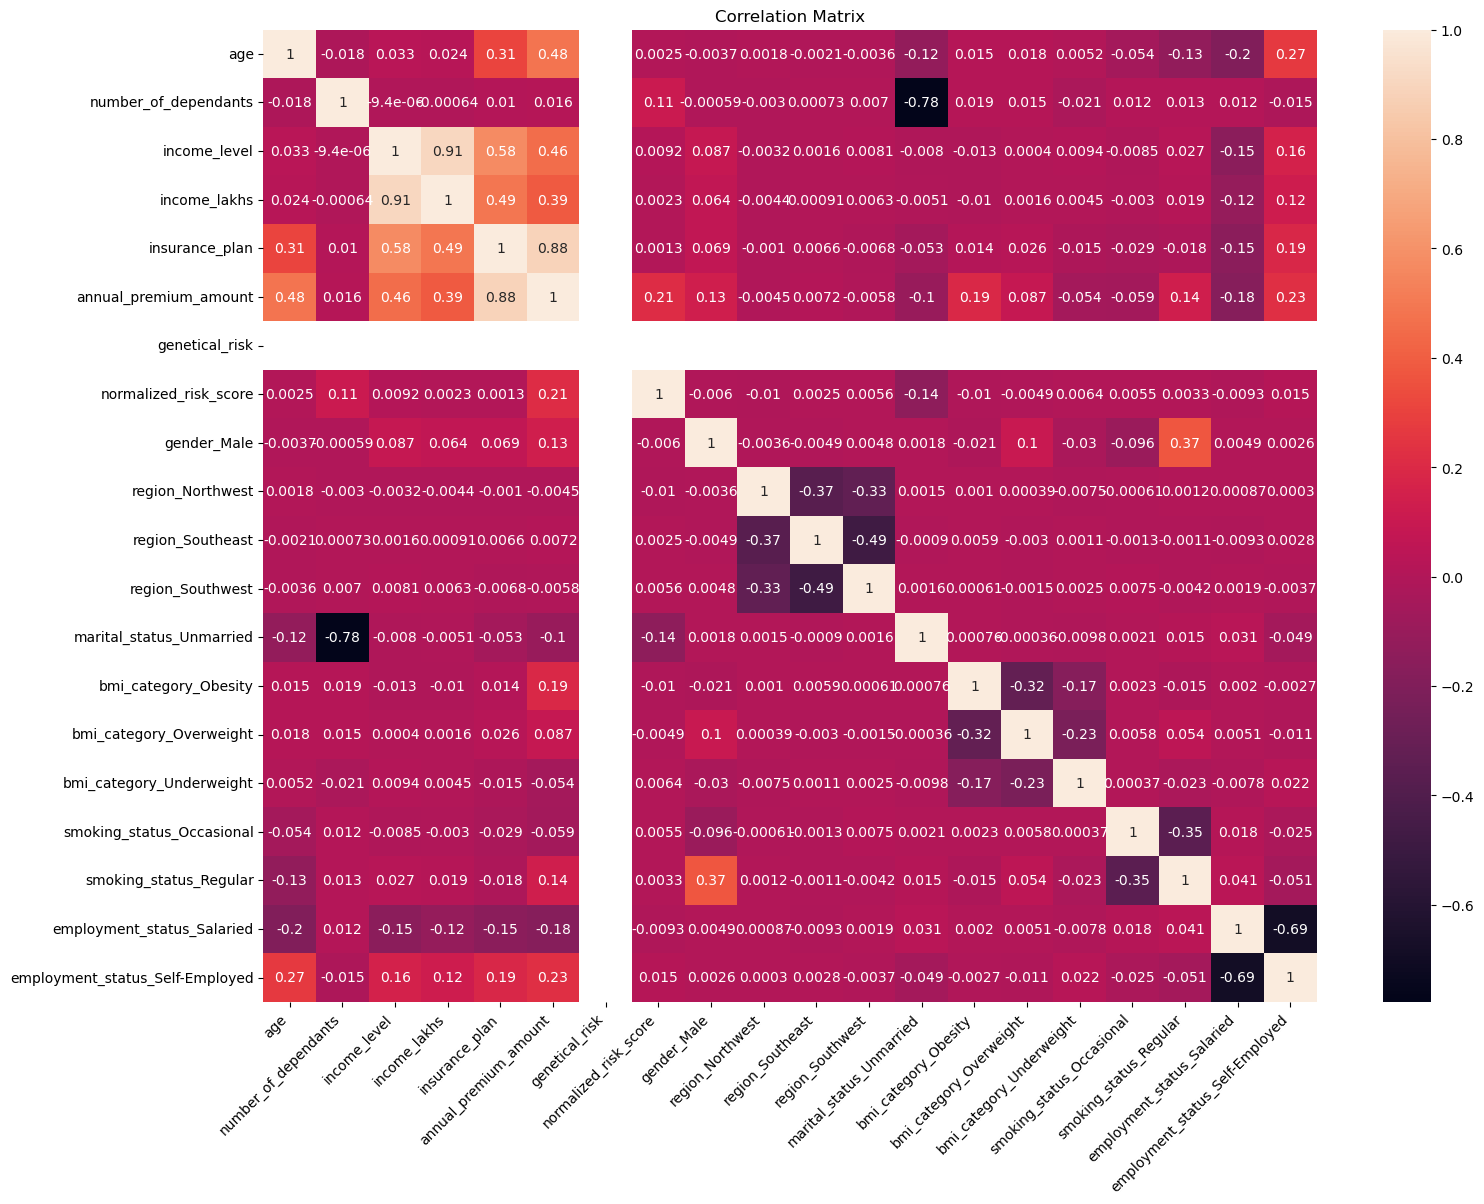

In [144]:
cm=df4.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.title("Correlation Matrix") 

plt.show()

In [145]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [146]:
X=df4.drop("annual_premium_amount",axis="columns")
y=df4["annual_premium_amount"]
from sklearn.preprocessing import MinMaxScaler
cols_to_scale=["age","number_of_dependants","income_level","income_lakhs","insurance_plan","genetical_risk"]
scaler=MinMaxScaler()
X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])
X.head(2)
X.describe()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [148]:
calculate_vif(X)

c:\Users\Satya\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_risk_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [149]:
calculate_vif(X.drop('income_level', axis="columns"))

c:\Users\Satya\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,normalized_risk_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


In [150]:
X_reduced=X.drop('income_level', axis="columns")
X_reduced.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


### Model Training

In [151]:
x_train,x_test,y_train,y_test=train_test_split(X_reduced, y, test_size=0.3, random_state=10)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20875, 18) (8947, 18) (20875,) (8947,)


In [152]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)
test_score=Lr.score(x_test,y_test)
train_score=Lr.score(x_train,y_train)
print("Test Score:",test_score)
print("Train Score:",train_score)

Test Score: 0.9538448451629948
Train Score: 0.9534163989489616


In [153]:
x_test.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
19713,0.652174,0.0,0.262626,1.0,0.0,0.428571,0,0,0,1,1,0,0,0,0,0,0,1
14750,0.000000,0.8,0.101010,0.5,0.0,1.000000,0,0,0,1,0,0,0,1,0,1,1,0


In [154]:
Lr.coef_

array([ 7.01623933e+03, -1.31176470e+03, -7.08193369e+02,  1.48359882e+04,
        1.13686838e-12,  6.05362412e+03,  3.75582688e+01, -5.52508721e+01,
       -1.96225429e+01, -2.22896756e+01, -7.00320200e+02,  3.92681271e+03,
        1.97945605e+03,  6.12866236e+02,  8.37395101e+02,  2.80066184e+03,
       -4.54913671e+01,  2.43078421e+02])

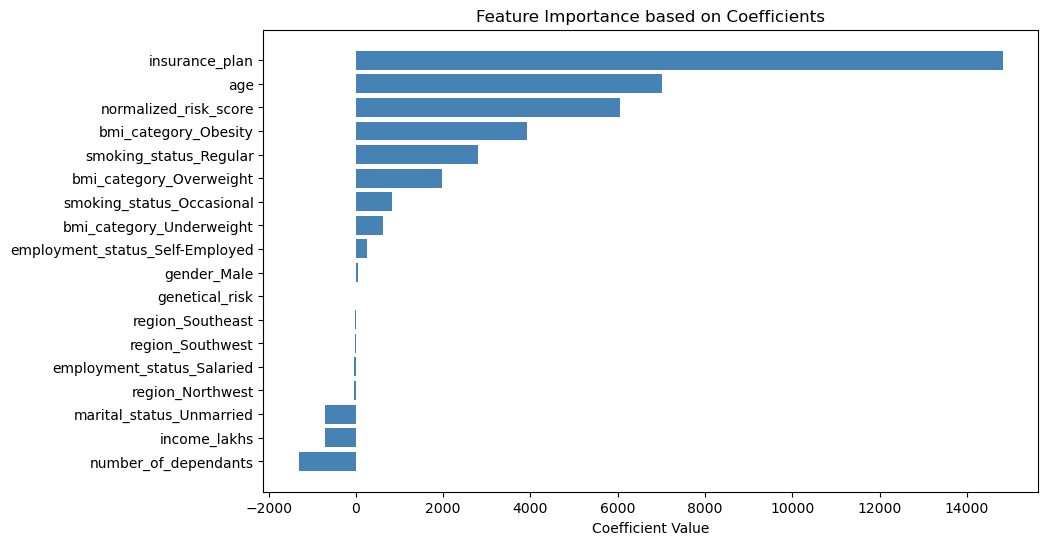

In [155]:
features_importance=Lr.coef_
coef_df=pd.DataFrame(features_importance,index=x_test.columns,columns=["Coefficients"])
coef_df=coef_df.sort_values(by="Coefficients", ascending=True)



plt.figure(figsize=(10,6))
plt.barh(coef_df.index, coef_df['Coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on Coefficients')
plt.show()


In [156]:
Lr.intercept_

5935.9812893446

In [157]:
model_ridge=Ridge()
model_ridge.fit(x_train,y_train)
test_score=model_ridge.score(x_test,y_test)
train_score=model_ridge.score(x_train,y_train)
print("Test Score:",test_score)
print("Train Score:",train_score)

Test Score: 0.9538456995663842
Train Score: 0.9534162332209687


In [158]:
model_lasso=Lasso()
model_lasso.fit(x_train,y_train)
test_score=model_lasso.score(x_test,y_test)
train_score=model_lasso.score(x_train,y_train)
print("Test Score:",test_score)
print("Train Score:",train_score)

Test Score: 0.9538410443658304
Train Score: 0.9534109910848642


In [159]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=10)
xgb_model.fit(x_train, y_train)
test_score=xgb_model.score(x_test,y_test)
train_score=xgb_model.score(x_train,y_train)
print("Test Score:",test_score)
print("Train Score:",train_score)

Test Score: 0.9979538321495056
Train Score: 0.9986370801925659


In [160]:
y_pred=xgb_model.predict(x_test)
mse_lr=mean_squared_error(y_test,y_pred)
rmse_lr=np.sqrt(mse_lr)
print(f"XGBoost Regression ==> MSE:,{mse_lr} RMSE: {rmse_lr}")

XGBoost Regression ==> MSE:,96814.21540071907 RMSE: 311.14982789762087


In [161]:
from sklearn.model_selection import RandomizedSearchCV
model_xgb=XGBRegressor()
param_grid={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5],
   
}
random_search=RandomizedSearchCV(estimator=model_xgb,param_distributions=param_grid,n_iter=10,cv=3,scoring="r2",random_state=42,n_jobs=-1)
random_search.fit(x_train,y_train)
best_model=random_search.best_score_
print("Best Model:",best_model)

Best Model: 0.9970577955245972


In [162]:
best_model=random_search.best_estimator_

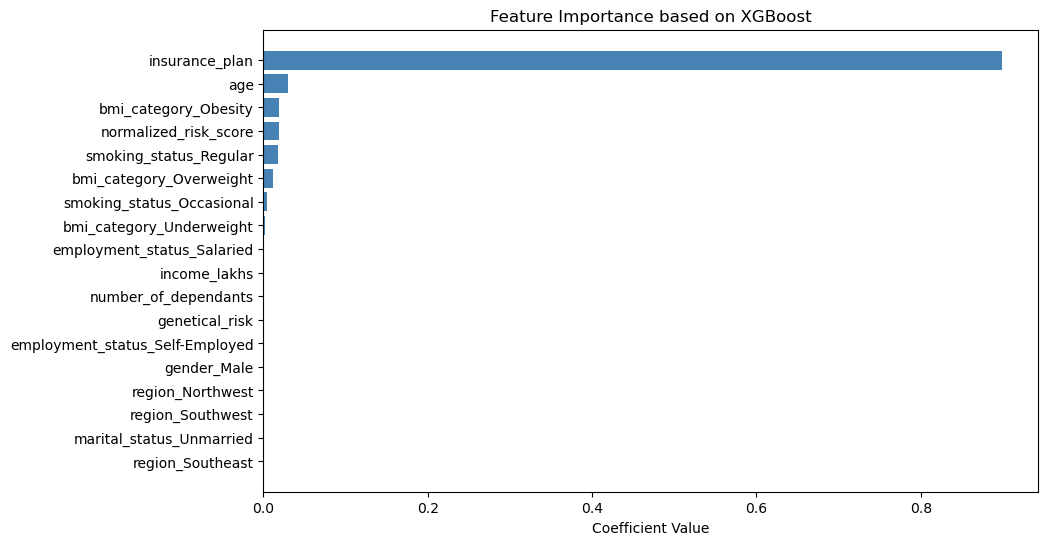

In [163]:
features_importance=best_model.feature_importances_
coef_df=pd.DataFrame(features_importance,index=x_test.columns,columns=["Coefficients"])
coef_df=coef_df.sort_values(by="Coefficients", ascending=True)



plt.figure(figsize=(10,6))
plt.barh(coef_df.index, coef_df['Coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on XGBoost')
plt.show()

### Error Analysis

In [164]:
y_pred=best_model.predict(x_test)
residuals=y_test-y_pred
residual_pct=residuals*100/y_test
result_df=pd.DataFrame(
    {
        "actual":y_test,
        "predicted":y_pred,
        "diff":residuals,
        "diff_pct":residual_pct
    }
)
result_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26691.470703,203.529297,0.756755
14750,22734,22650.751953,83.248047,0.366183
19932,21198,21581.894531,-383.894531,-1.810994
29643,9100,9425.934570,-325.934570,-3.581699
17076,26434,26691.470703,-257.470703,-0.974013


<Axes: xlabel='diff_pct', ylabel='Count'>

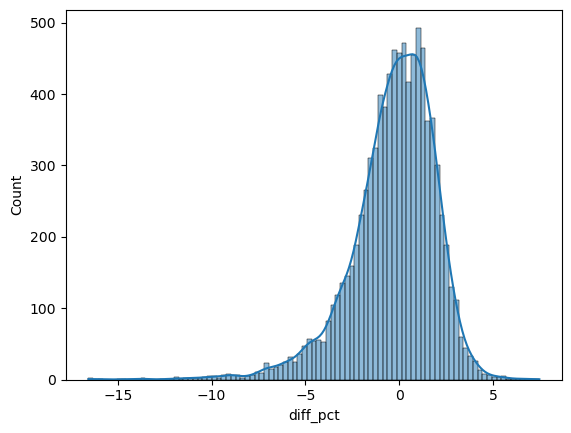

In [165]:
sns.histplot(result_df["diff_pct"],kde=True)

In [166]:
extreme_error_threshold=10
extreme_result_df=result_df[np.abs(result_df.diff_pct)>extreme_error_threshold]
extreme_result_df.shape

(29, 4)

In [167]:
extreme_error_pct=extreme_result_df.shape[0]*100/result_df.shape[0]
extreme_error_pct

0.32413099362914943

In [168]:
result_df[np.abs(result_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,diff,diff_pct


In [169]:
x_test.index

Index([19713, 14750, 19932, 29643, 17076, 20314, 24893, 26722, 25844, 10731,
       ...
       10637,  1224, 17046, 19228,  9275,  3387,  7858,  9744,  4849,  8986],
      dtype='int64', length=8947)

In [170]:
extreme_result_df.index

Index([14286, 27518,  9285,  7547, 21910, 12189, 21141, 16263,  8216, 13973,
        9150, 24145, 18522,  6163, 18681, 19145, 21455, 22666,  7508, 10741,
        6517, 18834, 13744, 24119,  2695, 25658, 11019, 14037,  7654],
      dtype='int64')

In [171]:
extreme_erorr_df=x_test.loc[extreme_result_df.index]
extreme_erorr_df

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
14286,0.021739,0.6,0.050505,0.0,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,1,0
27518,0.304348,0.6,0.080808,0.0,0.0,0.357143,1,1,0,0,0,0,0,0,0,0,0,1
9285,0.326087,0.6,0.010101,0.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
7547,0.347826,0.2,0.080808,0.0,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,1,0
21910,0.043478,0.6,0.020202,0.0,0.0,0.000000,1,0,1,0,0,0,0,0,0,0,0,0
12189,0.043478,0.6,0.060606,0.0,0.0,0.000000,1,0,0,1,0,0,0,0,0,0,1,0
21141,0.239130,0.6,0.000000,0.0,0.0,0.857143,0,0,0,1,0,0,0,0,0,0,0,1
16263,0.673913,0.6,0.383838,0.0,0.0,0.000000,1,1,0,0,0,0,0,0,0,0,0,0
8216,0.152174,0.4,0.010101,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,1,0
13973,0.152174,0.8,0.030303,0.0,0.0,0.857143,0,1,0,0,0,0,0,0,0,0,0,1


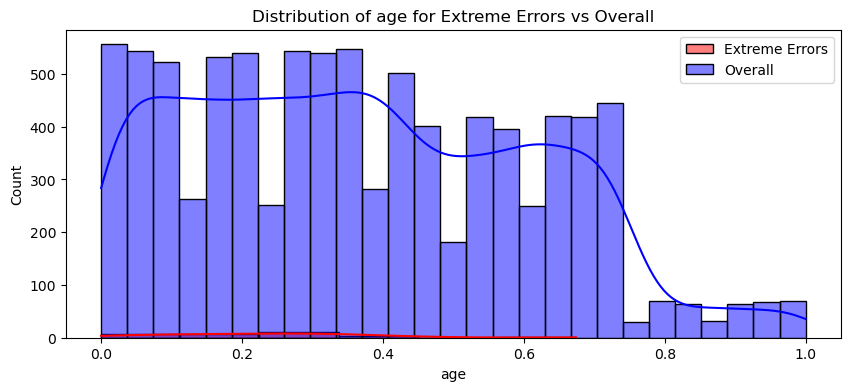

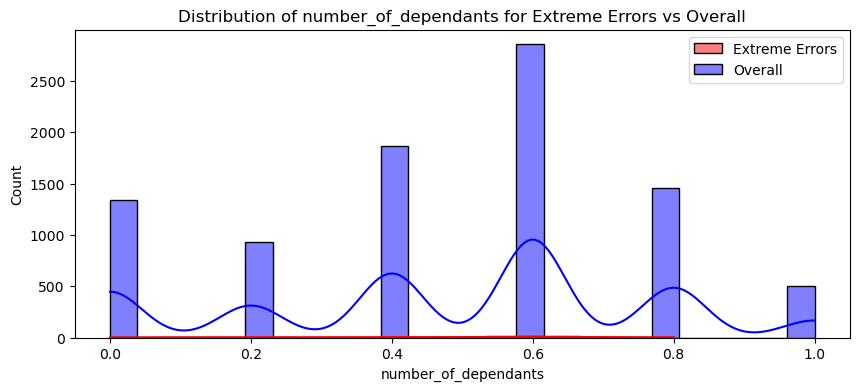

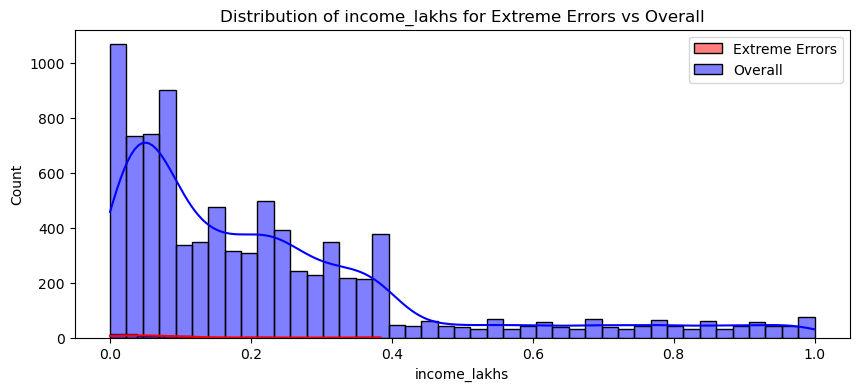

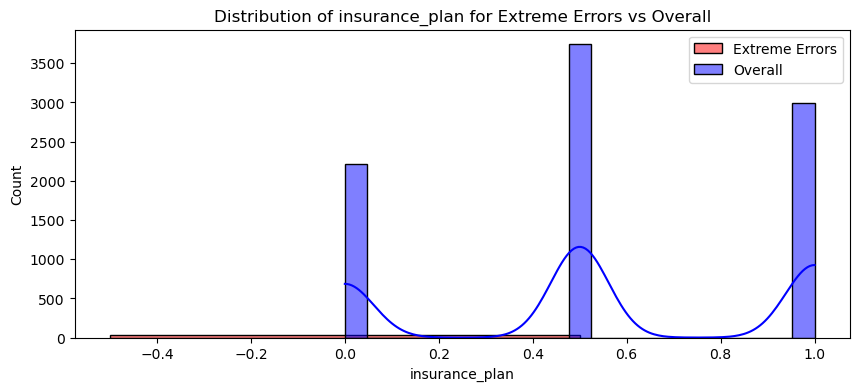

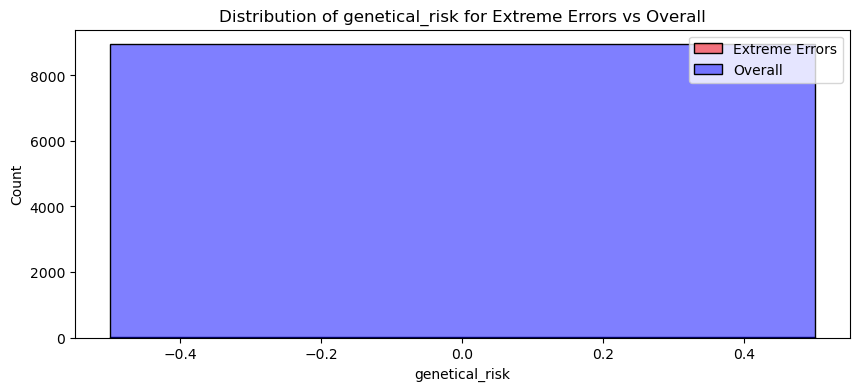

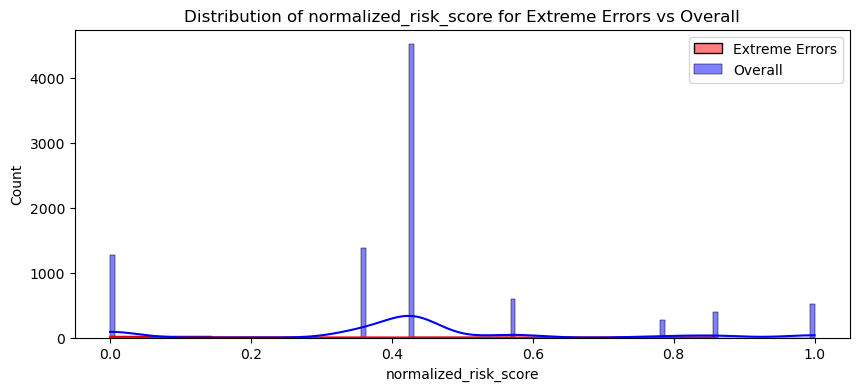

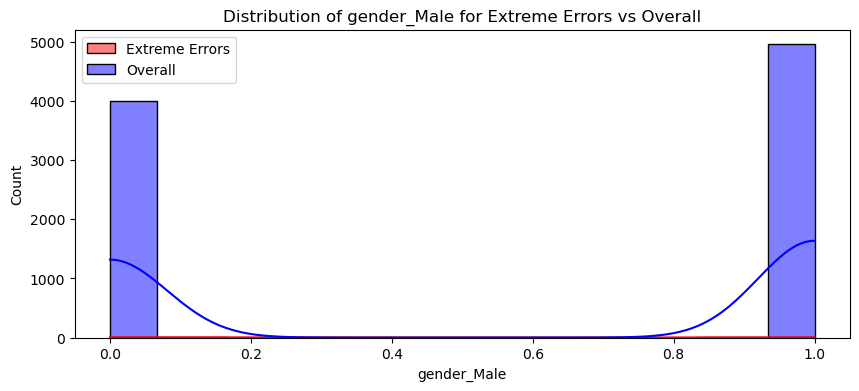

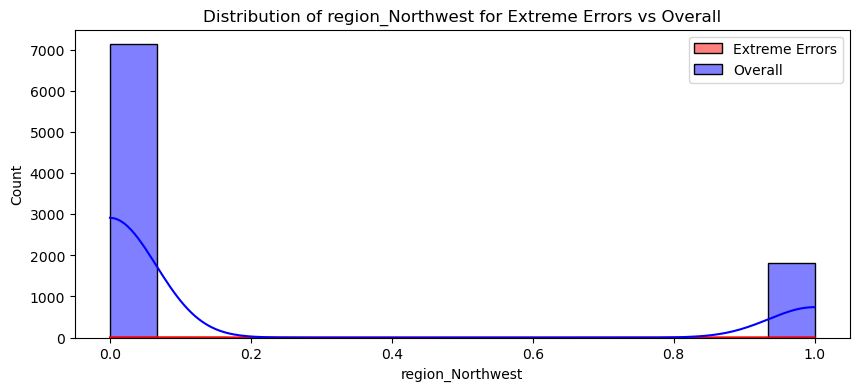

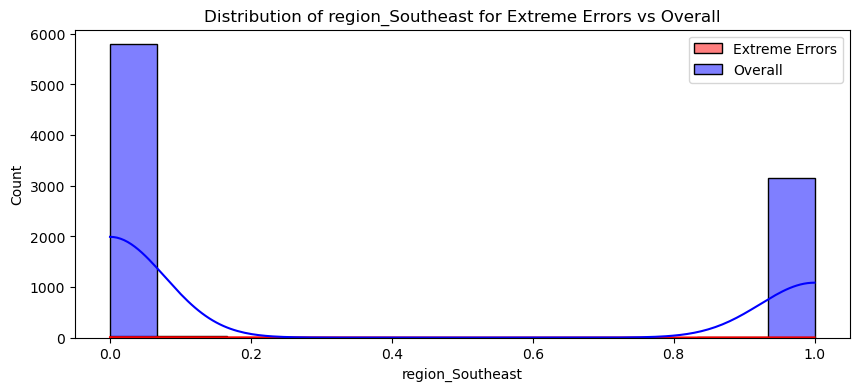

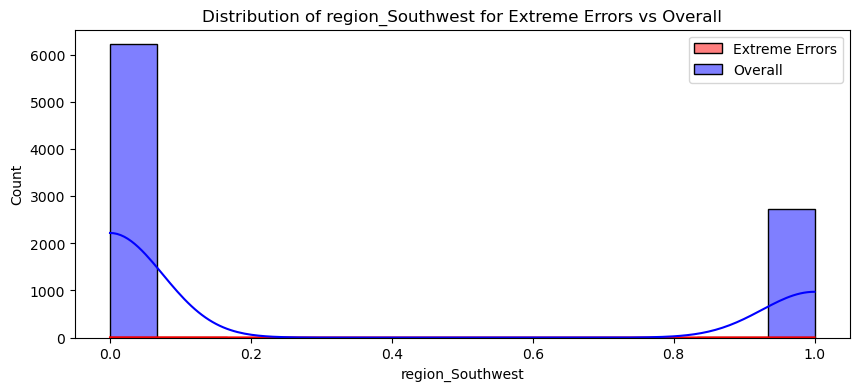

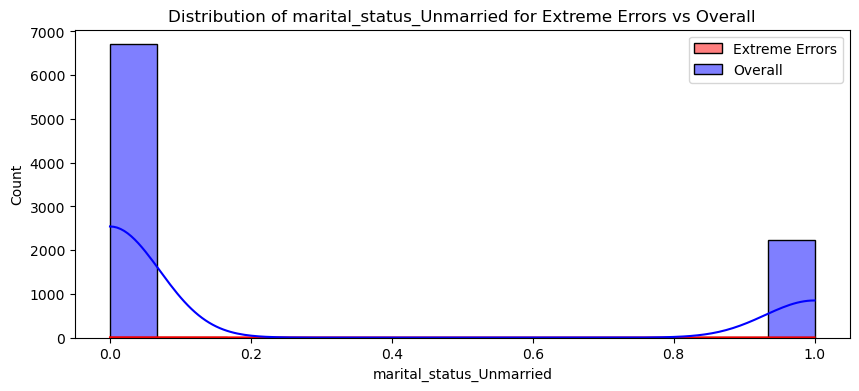

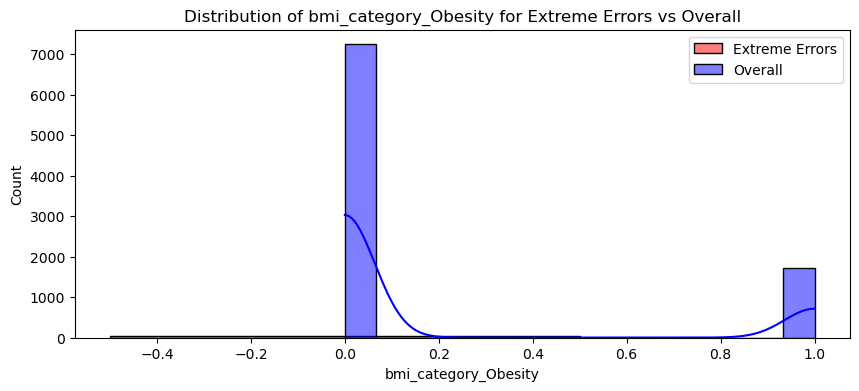

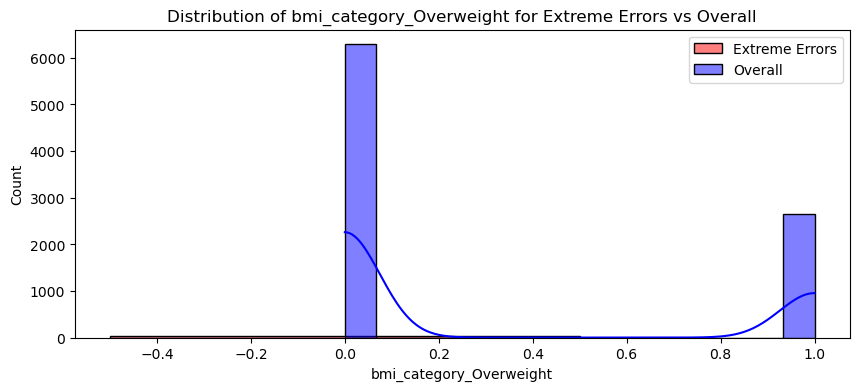

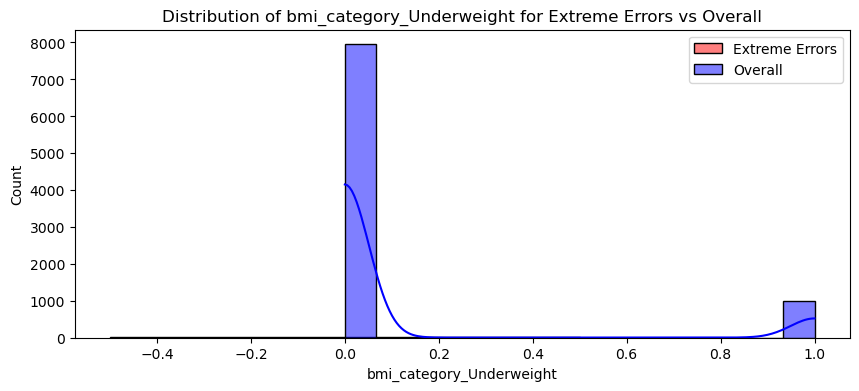

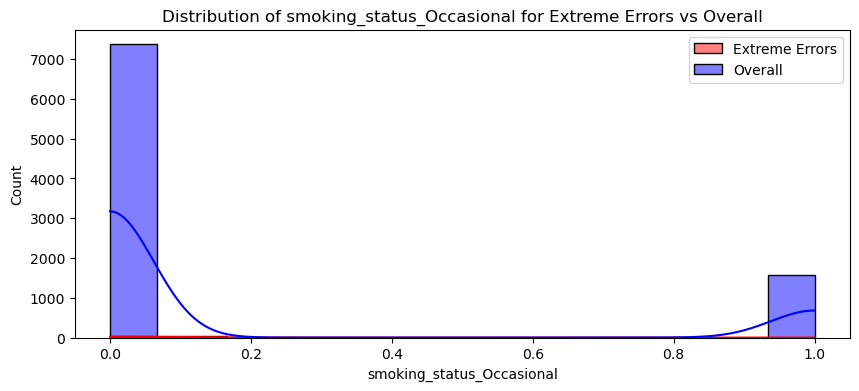

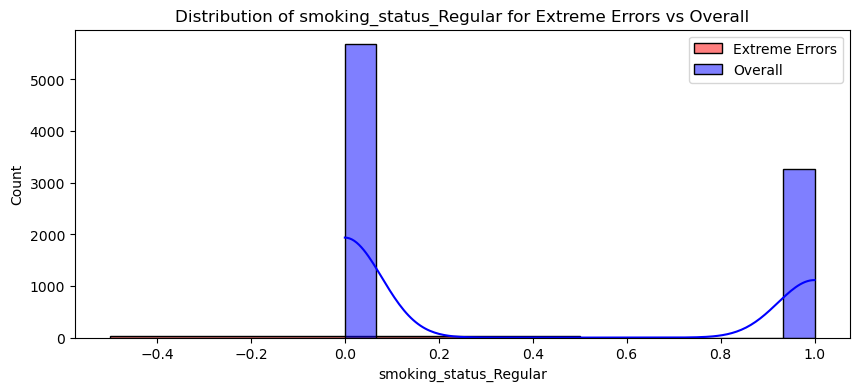

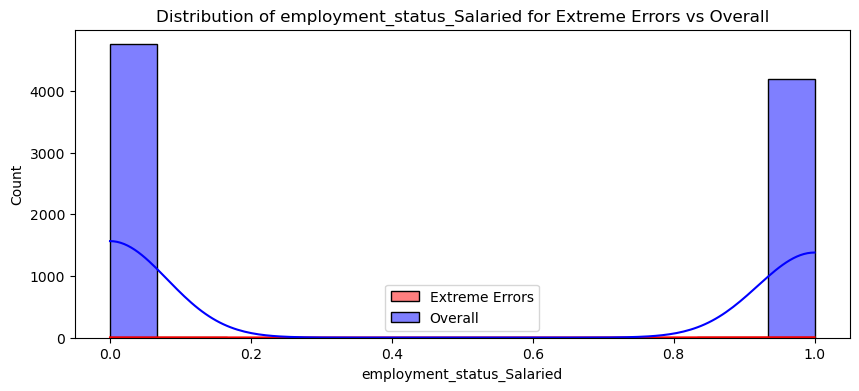

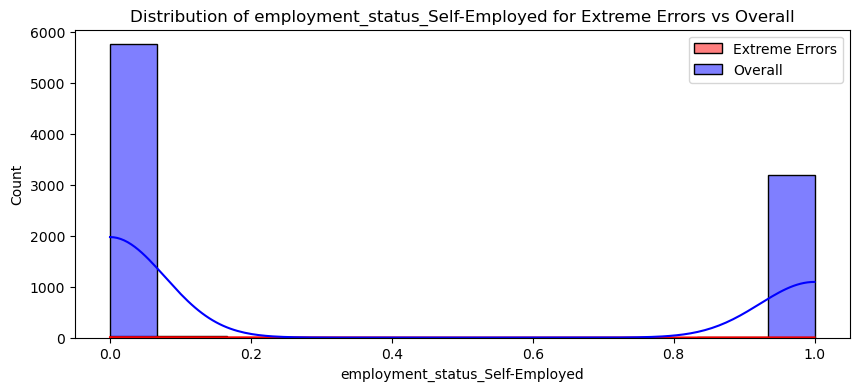

In [172]:
for feature in x_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_erorr_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(x_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [173]:
extreme_erorr_df["income_level"]=-1

<Axes: xlabel='age', ylabel='Count'>

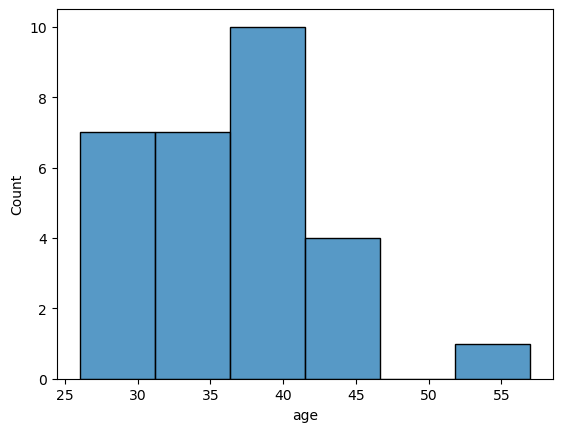

In [174]:
df_reversed=pd.DataFrame()

df_reversed[cols_to_scale]=scaler.inverse_transform(extreme_erorr_df[cols_to_scale])
sns.histplot(df_reversed.age)

##  Exporting Model

In [175]:
from joblib import dump
dump(best_model,"artifact/model_rest.joblib")
scaler_with_cols={
    "scaler":scaler,
    "cols_to_scale":cols_to_scale   }
dump(scaler_with_cols,"artifact/scaler_rest.joblib")

['artifact/scaler_rest.joblib']